In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten

import numpy as np

dino_file = 'dinofunworld.db'
conn = sqlite3.connect(dino_file)
c = conn.cursor()

In [10]:
def findseq(s):
    s_array = s.split('-')
    for i in range(len(s_array)):
        s_array[i] = int(s_array[i])
    return s_array

c.execute('Select visitorID, sequence from sequences where visitorID in (165316, 1835254, 296394, 404385, 448990)')
seq_data = pd.DataFrame(c.fetchall())
print(seq_data)

seqs = []
for i in range(len(seq_data)):
    sequence = np.transpose(findseq(seq_data[1][i]))
    seqs.append(sequence)
    
visid = []
for i in range(len(seq_data)):
    visid.append(seq_data[0][i])
    
visid

         0                                                  1
0   165316  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
1   296394  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
2   404385  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
3   448990  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
4  1835254  0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...


[165316, 296394, 404385, 448990, 1835254]

In [11]:
results = sum(map(list,list(seqs)), [])
X = np.matrix(results).reshape(-1,5)

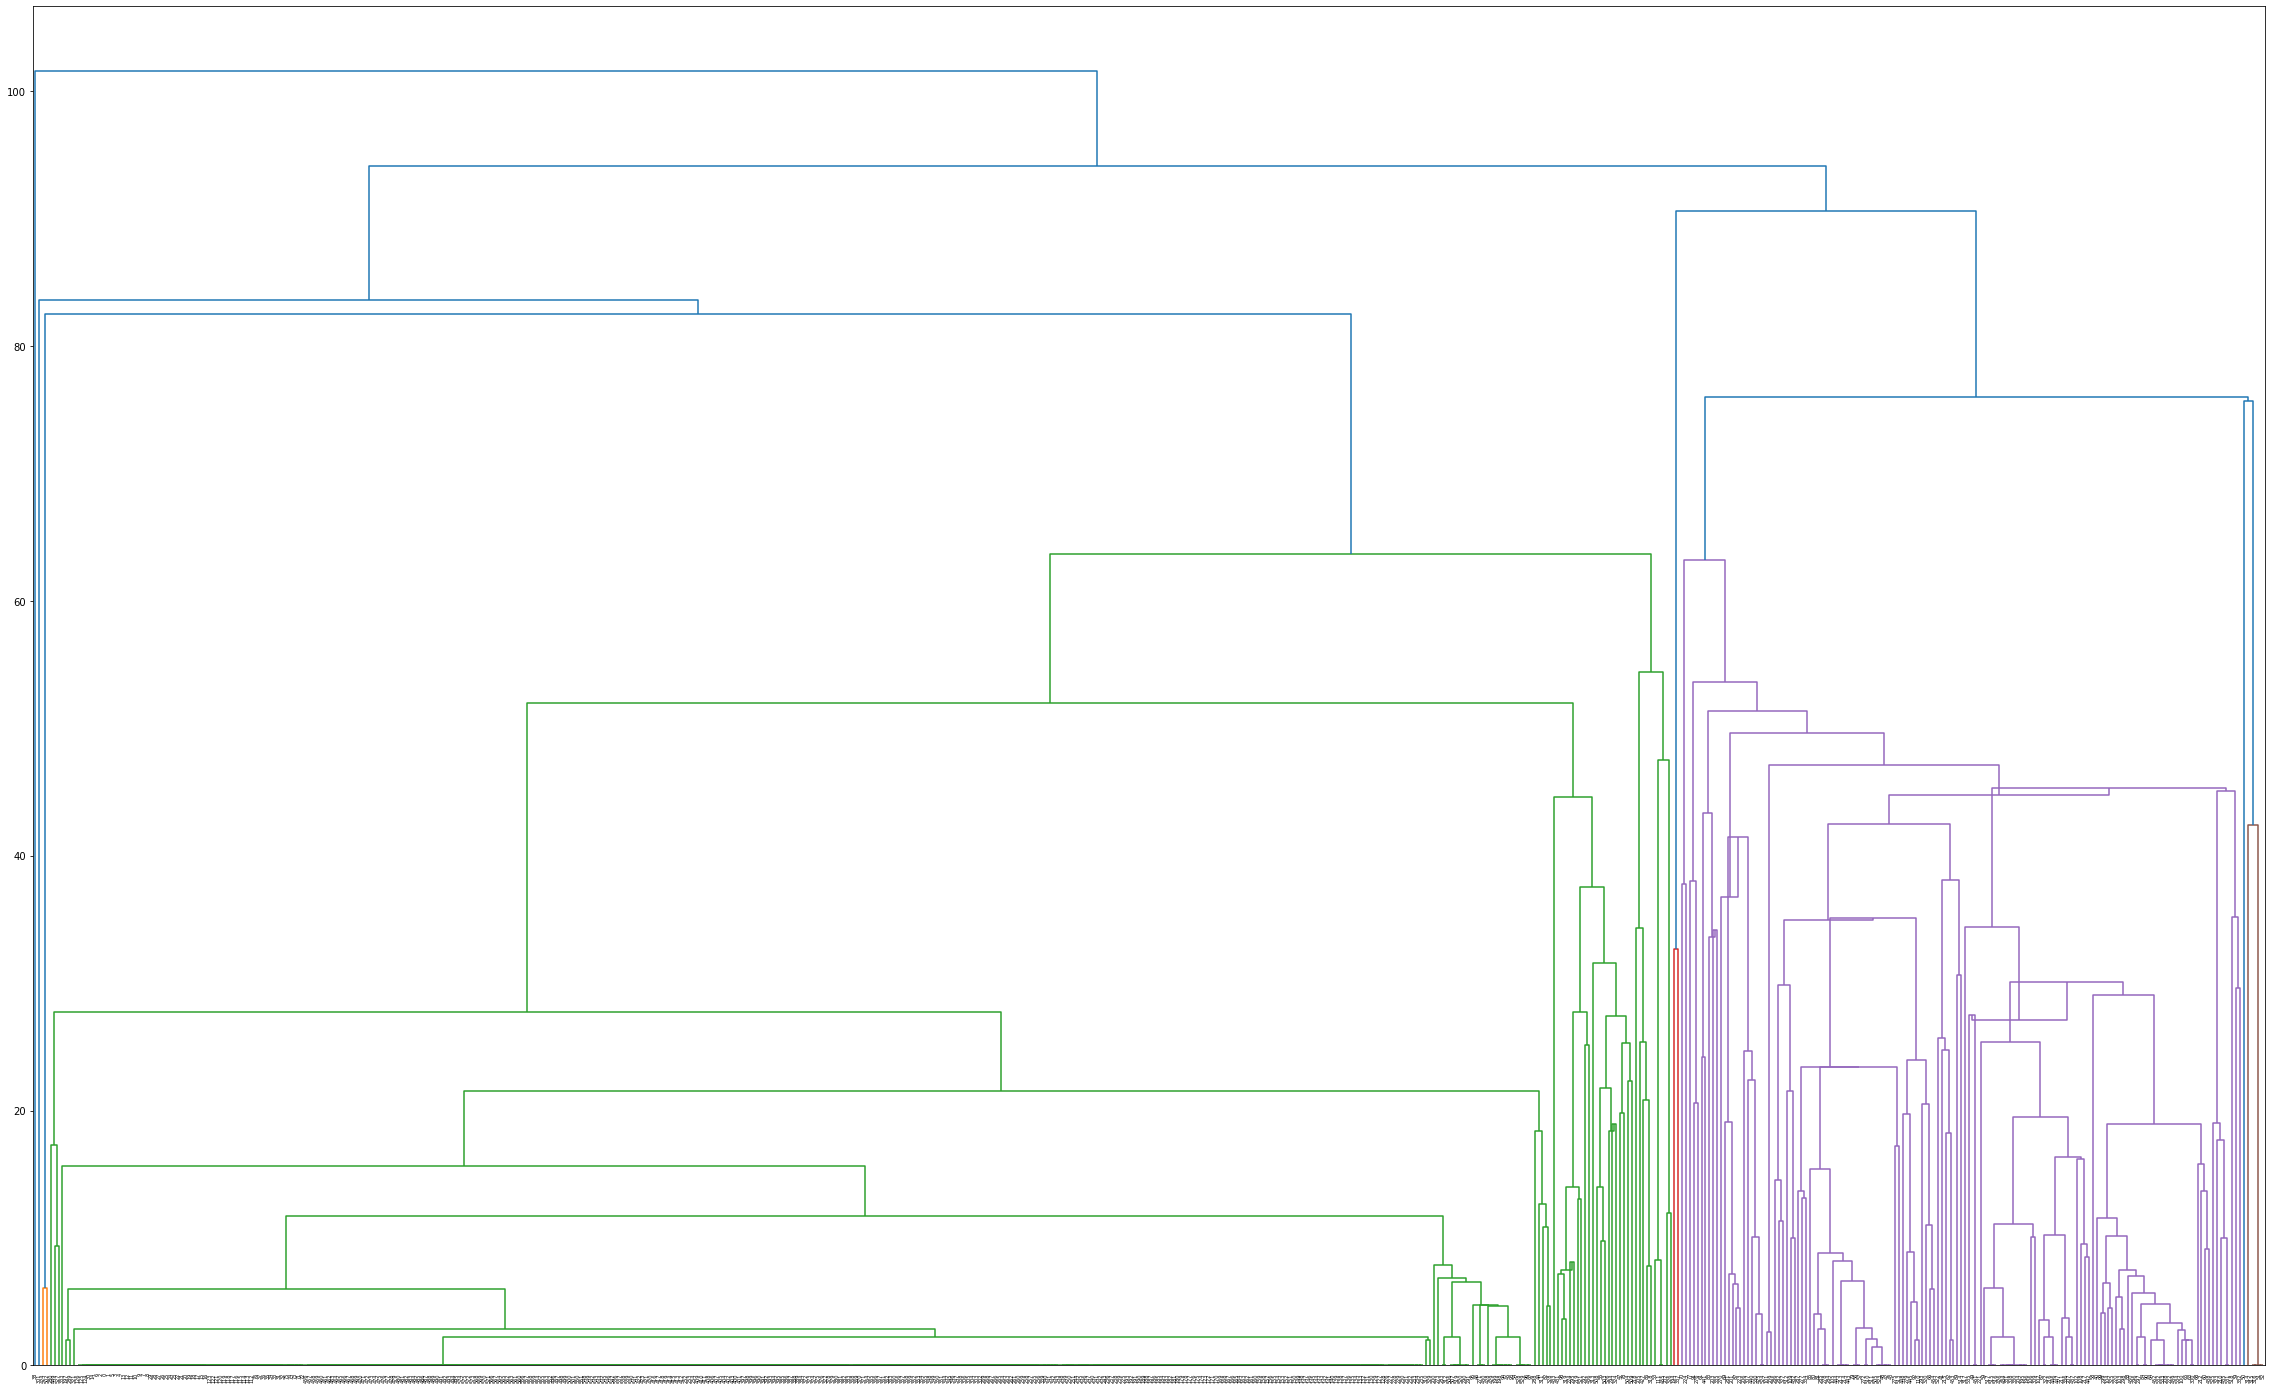

In [12]:
links = linkage(X, 'centroid')
plt.figure(figsize=(40,25))
dendrogram(links)

plt.show()

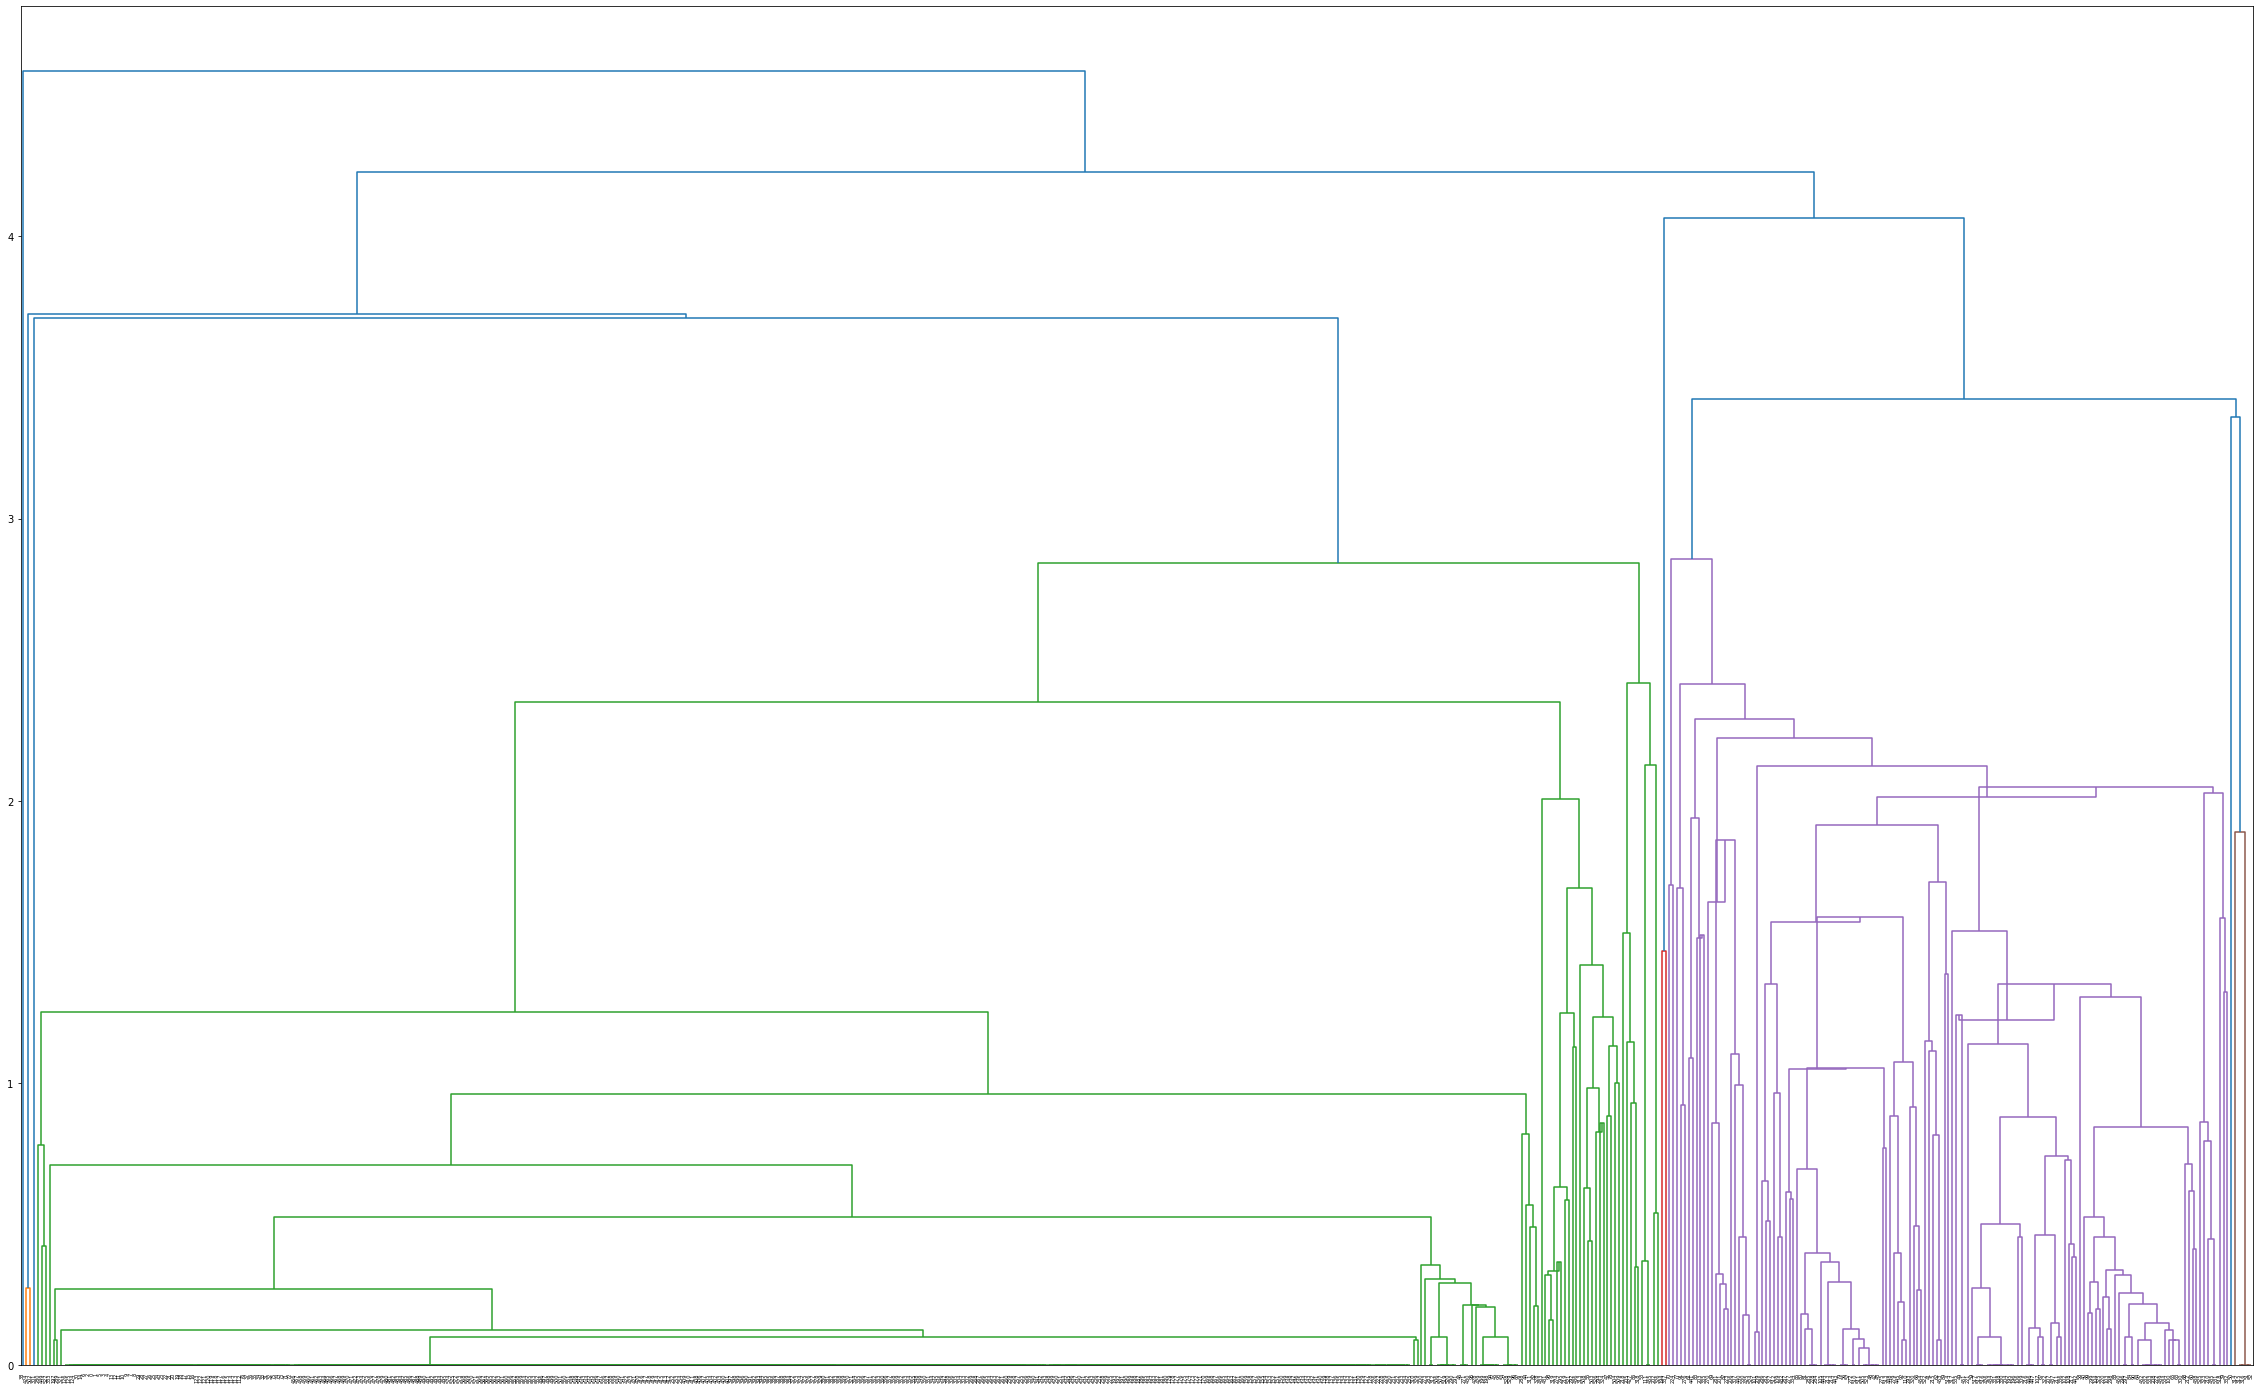

In [13]:
Y = whiten(X)

links = linkage(Y, 'centroid')
plt.figure(figsize=(40,25))
dendrogram(links)

plt.show()

In [20]:
c.execute('Select visitorID, sequence from sequences where visitorID in (165316, 1835254, 296394, 404385, 448990)')
seqs = []
for i in range(len(seq_data)):
    sequence = findseq(seq_data[1][i])
    seqs.append(sequence)
visid = []
for i in range(len(seq_data)):
    visid.append([seq_data[0][i],i+1])
print("Visitor ID - "+str(visid))

dict_seq = []
for i in range(len(seqs)):
    dict_1 = []
    
    for j in range(len(seqs)):
        #if i != j:
        dissim = 0
        for k in range(len(seqs[j])):
            if seqs[j][k] != seqs[i][k]:
                dissim += 1
        dict_1.append(dissim)
    dict_seq.append(dict_1)

(dict_seq)

Visitor ID - [[165316, 1], [296394, 2], [404385, 3], [448990, 4], [1835254, 5]]


[[0, 318, 329, 318, 336],
 [318, 0, 303, 0, 282],
 [329, 303, 0, 303, 298],
 [318, 0, 303, 0, 282],
 [336, 282, 298, 282, 0]]

<ipython-input-21-e0c2ae694948>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  links = linkage(dict_seq, 'average')


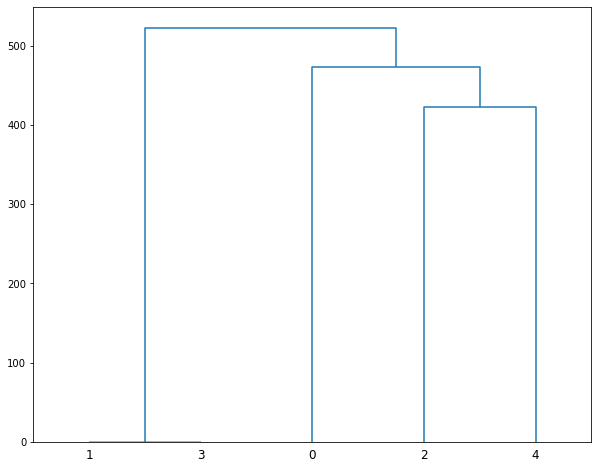

In [21]:
links = linkage(dict_seq, 'average')
plt.figure(figsize=(10,8))
dendrogram(links)

plt.show()

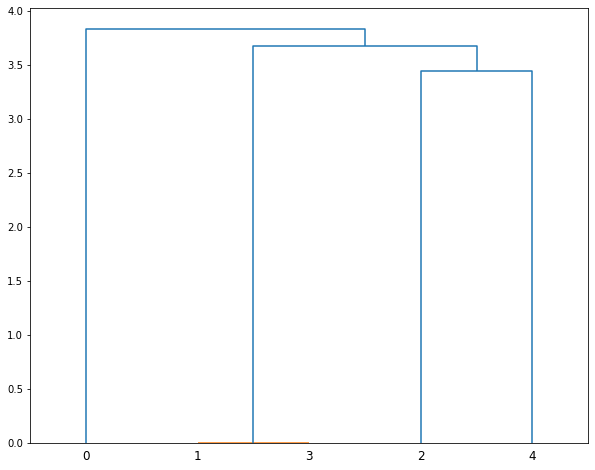

In [22]:
Y = whiten(dict_seq)
links = linkage(Y, 'average')
plt.figure(figsize=(10,8))
dendrogram(links)
plt.show()